In [ ]:
pip install python-doctr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install "python-doctr[tf]"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install "python-doctr[torch]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install django-weasyprint

In [ ]:
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

In [ ]:
from doctr.io import DocumentFile

#webpage_doc = DocumentFile.from_url("https://drive.google.com/file/d/1aJsl_lPHV87SVzzNzUyxXsbSEV8NTIi9/view?usp=share_link")

pdf_doc = DocumentFile.from_images("test2.jpg")

#pdf_doc = DocumentFile.from_pdf("siri.pdf")

#pdf_doc = DocumentFile.from_pdf("Doc1.pdf")

#multi_img_doc = DocumentFile.from_images(["test1.jpg", "test2.jpg"])

In [ ]:
result = model(pdf_doc)

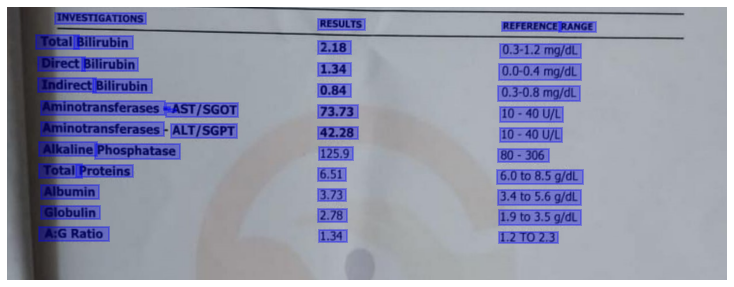

In [ ]:
result.show(pdf_doc)

In [ ]:
result

Document(
  (pages): [Page(
    dimensions=(471, 1243)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='INVESTIGATIONS', confidence=0.63)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='RESULTS', confidence=1.0)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='REFERENCE', confidence=0.99),
            Word(value='RANGE', confidence=1.0),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='Total', confidence=0.9),
            Word(value='Bilirubin', confidence=1.0),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='2.18', confidence=0.55)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='0

In [ ]:
new_output=result.render()

In [ ]:
type(new_output)

str

In [ ]:
new_output

'INVESTIGATIONS\n\nRESULTS\n\nREFERENCE RANGE\n\nTotal Bilirubin\n\n2.18\n\n0.3-1.2mg/dL\n\nDirect Bilirubin\n\n1.34\n\n0.0-0.4mg/dL\n\nIndirect Bilirubin\n\n0.84\n\n0.3-0.8mg/dL\n\nAminotransferases - AST/SGOT *\n\n73.73\n\n10-40U/L\n\nAminotransferases ALT/SGPT\n\n42.28\n\n10-40U/L\n\nAlkaline Phosphatase\n\n125.9\n\n80-306\n\nTotal Proteins\n\n6.51\n\n6.0to8.5g/dL\n\nAlbumin\n\n3.73\n\n3.4to5.6g/dL\n\nGlobulin\n\n2.78\n\n1.9to3.5g/dL\n\nA:GRatio\n\n1.34\n\n1.2TO2.3'

In [ ]:
final_output=new_output.split("\n\n")

In [ ]:
final_output



['INVESTIGATIONS',
 'RESULTS',
 'REFERENCE RANGE',
 'Total Bilirubin',
 '2.18',
 '0.3-1.2mg/dL',
 'Direct Bilirubin',
 '1.34',
 '0.0-0.4mg/dL',
 'Indirect Bilirubin',
 '0.84',
 '0.3-0.8mg/dL',
 'Aminotransferases - AST/SGOT *',
 '73.73',
 '10-40U/L',
 'Aminotransferases ALT/SGPT',
 '42.28',
 '10-40U/L',
 'Alkaline Phosphatase',
 '125.9',
 '80-306',
 'Total Proteins',
 '6.51',
 '6.0to8.5g/dL',
 'Albumin',
 '3.73',
 '3.4to5.6g/dL',
 'Globulin',
 '2.78',
 '1.9to3.5g/dL',
 'A:GRatio',
 '1.34',
 '1.2TO2.3']

In [ ]:
pip install snowflake-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import getpass
pwd=getpass.getpass("Enter Password")

Enter Password··········


In [ ]:
import snowflake.connector
conn=snowflake.connector.connect(user='team01', password=str(pwd),account='ni17018.ap-southeast-1',warehouse='compute_wh')


/usr/local/lib/python3.8/dist-packages/snowflake/connector/options.py:96: UserWarning: You have an incompatible version of 'pyarrow' installed (9.0.0), please install a version that adheres to: 'pyarrow<8.1.0,>=8.0.0; extra == "pandas"'
  warn_incompatible_dep(


In [ ]:
def func(i):

    invest = final_output[3+3*i]
    res = final_output[4+3*i]
    ref = final_output[5+3*i]

    inv1 = "'" + invest + "'"
    res1 = "'" + res + "'"
    ref1 = "'" + ref + "'"

    sql = 'insert into "COLAB"."MEDICAL_TEST"."TEST" values('+inv1+','+res1+','+ref1+')'

    return sql

In [ ]:
length = int((len(final_output)-3)/3)

for i in range(length):
  res = conn.cursor().execute(func(i)).fetchall()


In [ ]:
df = pd.read_sql(sql, conn)
df.info()

How do you test OCR accuracy?
# Measuring OCR accuracy is done by taking the output of an OCR run for an image and comparing it to the original version of the same text. You can then either count how many characters were detected correctly (character level accuracy), or count how many words were recognized correctly (word level accuracy)